# **Deep Learning for Computer Vision**

### Dr. Santosh Chapaneri
### Lead AI Product Engineer, Wolters Kluwer

*   The Fashion MNIST database has a database of fashion accessories.

*   https://www.tensorflow.org/datasets/catalog/fashion_mnist

*   Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms. Han Xiao, Kashif Rasul, Roland Vollgraf. arXiv:1708.07747, 2017.

*   The training set has  60,000  samples. The test set has  10,000  samples.

*   The fashion accessories are size-normalized and centered in a fixed-size image.

*   We will train Multi-layer Perceptron, Deep Multi-layer Perceptron and CNN classifier using Keras for Fashion MNIST dataset.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [2]:
# Load the fashion-mnist pre-shuffled train data and test data
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
# Print training set shape - note there are 60,000 training data of image size of 28x28, 60,000 train labels)
print("X_train shape:", X_train.shape, "Y_train shape:", Y_train.shape)

X_train shape: (60000, 28, 28) Y_train shape: (60000,)


** Visualize the data**

Y = 6 Shirt


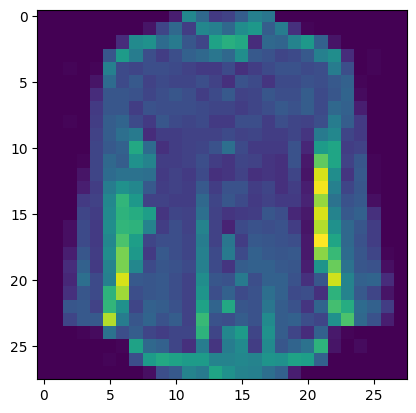

In [4]:
# Define the labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2
                        "Dress",        # index 3
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6
                        "Sneaker",      # index 7
                        "Bag",          # index 8
                        "Ankle boot"]   # index 9

# Image index, you can pick any number between 0 and 59,999
img_index = 554

# y_train contains the lables, ranging from 0 to 9
label_index = Y_train[img_index]

# Print the label, for example 2 Pullover
print ("Y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))

# # Show one of the images from the training dataset
plt.imshow(X_train[img_index])

In [5]:
img_rows, img_cols = 28, 28

# MLP
X_train_mlp = X_train.reshape(X_train.shape[0], img_rows*img_cols)
Y_train_mlp = Y_train
X_test_mlp = X_test.reshape(X_test.shape[0], img_rows*img_cols)
Y_test_mlp = Y_test

# CNN
X_train_cnn = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
Y_train_cnn = Y_train
X_test_cnn = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
Y_test_cnn = Y_test

In [6]:
print(X_train_mlp.shape)
print(X_train_cnn.shape)

(60000, 784)
(60000, 28, 28, 1)


In [7]:
X_train_mlp_f = X_train_mlp.astype('float32')
X_test_mlp_f = X_test_mlp.astype('float32')
X_train_mlp_f /= 255
X_test_mlp_f /= 255

X_train_cnn_f = X_train_cnn.astype('float32')
X_test_cnn_f = X_test_cnn.astype('float32')
X_train_cnn_f /= 255
X_test_cnn_f /= 255

In [8]:
# All Value should be in between 0 and 1
print('mlp f', X_train_mlp_f[10][:10])
print('cnn f', X_train_cnn_f[10][10:15, 10:15])

mlp f [0.         0.         0.         0.         0.         0.
 0.         0.04313726 0.5568628  0.78431374]
cnn f [[[0.6509804 ]
  [0.59607846]
  [0.61960787]
  [0.61960787]
  [0.627451  ]]

 [[0.62352943]
  [0.6       ]
  [0.6156863 ]
  [0.61960787]
  [0.63529414]]

 [[0.61960787]
  [0.60784316]
  [0.63529414]
  [0.61960787]
  [0.627451  ]]

 [[0.59607846]
  [0.627451  ]
  [0.61960787]
  [0.6313726 ]
  [0.627451  ]]

 [[0.5764706 ]
  [0.6431373 ]
  [0.60784316]
  [0.64705884]
  [0.6313726 ]]]


In [9]:
# Convert class vectors to binary class matrices
num_classes = 10

Y_train_mlp_b = keras.utils.to_categorical(Y_train_mlp, num_classes)
Y_test_mlp_b = keras.utils.to_categorical(Y_test_mlp, num_classes)

Y_train_cnn_b = keras.utils.to_categorical(Y_train_cnn, num_classes)
Y_test_cnn_b = keras.utils.to_categorical(Y_test_cnn, num_classes)

In [10]:
Y_train_cnn_b[:5,:]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [11]:
# Split data to optimize classifier during training
X_train_mlp_s, X_val_mlp_s, Y_train_mlp_s, Y_val_mlp_s = train_test_split(X_train_mlp_f, Y_train_mlp_b, test_size=0.2)
X_train_cnn_s, X_val_cnn_s, Y_train_cnn_s, Y_val_cnn_s = train_test_split(X_train_cnn_f, Y_train_cnn_b, test_size=0.2)

In [12]:
print(X_train_mlp_s.shape)
print(X_val_mlp_s.shape)

print(X_train_cnn_s.shape)
print(X_val_cnn_s.shape)

(48000, 784)
(12000, 784)
(48000, 28, 28, 1)
(12000, 28, 28, 1)


**Multi Layer Perceptron**

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.datasets import mnist

In [14]:
# Multilayer Perceptron model

batch_size = 256
num_epochs = 50

model = Sequential()

model.add(Dense(input_dim=784, activation='sigmoid', units=625, kernel_initializer='normal'))
model.add(Dense(input_dim=625, activation='softmax', units=10, kernel_initializer='normal'))
model.compile(optimizer=SGD(learning_rate=0.05), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 625)            │       490,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         6,260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 496,885 (1.90 MB)

 Trainable params: 496,885 (1.90 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history = model.fit(X_train_mlp_s, Y_train_mlp_s, batch_size = batch_size, epochs = num_epochs, verbose = 1, validation_data = (X_val_mlp_s, Y_val_mlp_s))

Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6253 - loss: 1.3867 - val_accuracy: 0.7098 - val_loss: 0.9872
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7333 - loss: 0.8582 - val_accuracy: 0.7341 - val_loss: 0.8016
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7535 - loss: 0.7332 - val_accuracy: 0.7524 - val_loss: 0.7160
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7686 - loss: 0.6724 - val_accuracy: 0.7622 - val_loss: 0.6697
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7810 - loss: 0.6328 - val_accuracy: 0.7642 - val_loss: 0.6476
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7894 - loss: 0.6045 - val_accuracy: 0.7859 - val_loss: 0.6105
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7963 - loss: 0.5818 - val_accuracy: 0.7902 - val_loss: 0.5886
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8028 - loss: 0.5643 - val_accuracy: 0.

In [16]:
score = model.evaluate(X_test_mlp_f, Y_test_mlp_b, verbose = 1)
print()
print('MLP Test loss:', score[0])
print('MLP Test accuracy:', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8388 - loss: 0.4510

MLP Test loss: 0.45098963379859924
MLP Test accuracy: 0.8388000130653381


**Deep Multi Layer Perceptron**

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import RMSprop
from keras.datasets import mnist

In [18]:
# Deep Multilayer Perceptron model- 784 x 625 x 625 x 625 x 10
model_deepmlp = Sequential()

model_deepmlp.add(Dense(input_dim=784, units=625, kernel_initializer='normal'))
model_deepmlp.add(Activation('relu'))
model_deepmlp.add(Dropout(0.2))

model_deepmlp.add(Dense(input_dim=625, units=625, kernel_initializer='normal'))
model_deepmlp.add(Activation('relu'))
model_deepmlp.add(Dropout(0.2))

model_deepmlp.add(Dense(input_dim=625, units=625, kernel_initializer='normal'))
model_deepmlp.add(Activation('relu'))
model_deepmlp.add(Dropout(0.2))

model_deepmlp.add(Dense(input_dim=625, units=10, kernel_initializer='normal'))
model_deepmlp.add(Activation('relu'))

model_deepmlp.compile(optimizer=RMSprop(learning_rate=0.001, rho=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

model_deepmlp.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 625)            │       490,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 625)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 625)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 625)            │       391,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 625)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 625)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 625)            │       391,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 625)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 625)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         6,260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,279,385 (4.88 MB)

 Trainable params: 1,279,385 (4.88 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
history_deepmlp = model_deepmlp.fit(X_train_mlp_s, Y_train_mlp_s, batch_size=batch_size, epochs=num_epochs, verbose=1, validation_data = (X_val_mlp_s, Y_val_mlp_s))

Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.3398 - loss: nan - val_accuracy: 0.1002 - val_loss: nan
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.1000 - loss: nan - val_accuracy: 0.1002 - val_loss: nan
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.1000 - loss: nan - val_accuracy: 0.1002 - val_loss: nan
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.1000 - loss: nan - val_accuracy: 0.1002 - val_loss: nan
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.1000 - loss: nan - val_accuracy: 0.1002 - val_loss: nan
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.1000 - loss: nan - val_accuracy: 0.1002 - val_loss: nan
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.1000 - loss: nan - val_accuracy: 0.1002 - val_loss: nan
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.1000 - loss: nan - val_accuracy: 0.1002 - val_loss: nan
Epoch 9/50
188/1

In [20]:
score = model_deepmlp.evaluate(X_test_mlp_f, Y_test_mlp_b, verbose = 1)
print()
print('Deep MLP Test loss:', score[0])
print('Deep MLP Test accuracy:', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1000 - loss: nan

Deep MLP Test loss: nan
Deep MLP Test accuracy: 0.10000000149011612


**Convolutional Neural Networks**

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [22]:
input_shape = (img_rows, img_cols, 1)

model_cnn = Sequential()
model_cnn.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='normal', input_shape=input_shape))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Dropout(0.25))

model_cnn.add(Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Dropout(0.25))

model_cnn.add(Conv2D(128, (3, 3), activation='relu'))
model_cnn.add(Dropout(0.25))

model_cnn.add(Flatten())

model_cnn.add(Dense(125, activation='softmax'))
model_cnn.add(Dropout(0.3))

model_cnn.add(Dense(num_classes, activation='softmax'))

model_cnn.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

model_cnn.summary()

C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 125)            │       144,125 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 125)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 238,057 (929.91 KB)

 Trainable params: 238,057 (929.91 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
history_cnn = model_cnn.fit(X_train_cnn_s, Y_train_cnn_s, batch_size = batch_size, epochs = num_epochs, verbose = 1, validation_data = (X_val_cnn_s, Y_val_cnn_s))

Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.2799 - loss: 2.1173 - val_accuracy: 0.4165 - val_loss: 1.9932
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.3675 - loss: 1.9180 - val_accuracy: 0.5383 - val_loss: 1.7826
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.4183 - loss: 1.7377 - val_accuracy: 0.5496 - val_loss: 1.6039
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.4241 - loss: 1.6136 - val_accuracy: 0.5715 - val_loss: 1.4683
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.4276 - loss: 1.5276 - val_accuracy: 0.5774 - val_loss: 1.3659
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.4330 - loss: 1.4659 - val_accuracy: 0.5798 - val_loss: 1.2881
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.4432 - loss: 1.4231 - val_accuracy: 0.5878 - val_loss: 1.2219
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.4456 - loss: 1.3877 - val_accu

In [24]:
score = model_cnn.evaluate(X_test_cnn_f, Y_test_cnn_b, verbose = 1)
print()
print('CNN Test loss:', score[0])
print('CNN Test accuracy:', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9019 - loss: 0.3683

CNN Test loss: 0.36826759576797485
CNN Test accuracy: 0.9018999934196472


**Results**

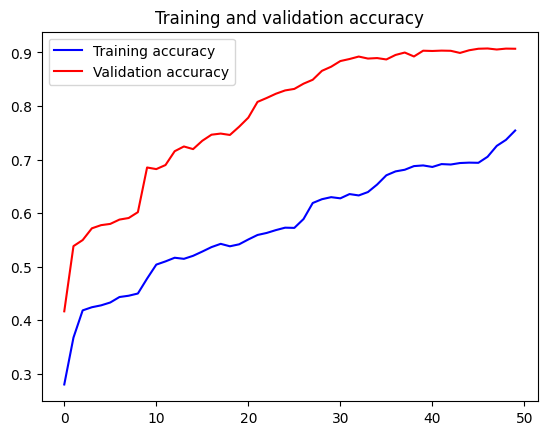

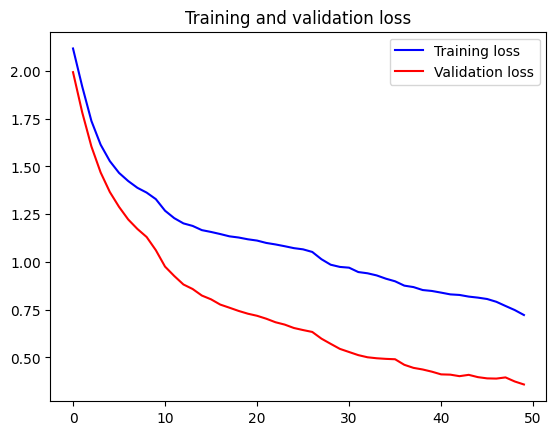

In [25]:
accuracy = history_cnn.history['accuracy']
val_accuracy = history_cnn.history['val_accuracy']

loss = history_cnn.history['loss']
val_loss = history_cnn.history['val_loss']

epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

**Classification Report**

In [26]:
# Get the predictions for the test data
predicted_probabilities = model_cnn.predict(X_test_cnn_f)
predicted_classes = np.argmax(predicted_probabilities, axis=1)

# Get the indices to be plotted
Y_true_cnn = Y_test
correct = np.nonzero(predicted_classes == Y_true_cnn)
incorrect = np.nonzero(predicted_classes != Y_test_cnn)

from sklearn.metrics import classification_report

target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(Y_true_cnn, predicted_classes, target_names = target_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

     Class 0       0.85      0.86      0.86      1000
     Class 1       1.00      0.97      0.98      1000
     Class 2       0.81      0.89      0.85      1000
     Class 3       0.89      0.91      0.90      1000
     Class 4       0.86      0.83      0.85      1000
     Class 5       0.99      0.97      0.98      1000
     Class 6       0.73      0.68      0.70      1000
     Class 7       0.93      0.98      0.96      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.98      0.95      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



**Subset of correctly predicted classes:**

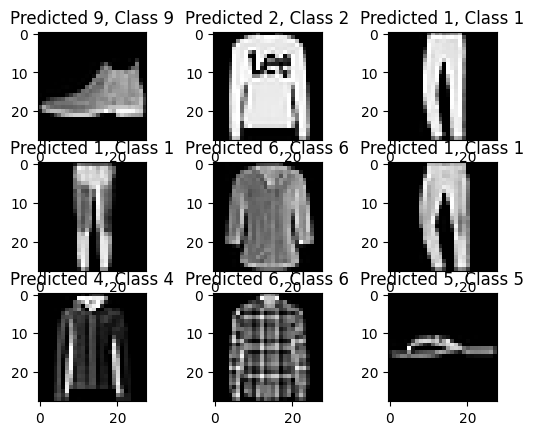

In [29]:
i=1
for j in range(9):
    plt.subplot(3,3,i)
    plt.imshow(X_test_cnn[correct[0][j]].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct[0][j]], Y_true_cnn[correct[0][j]]))
    i+=1

**Subset of incorrectly predicted classes:**

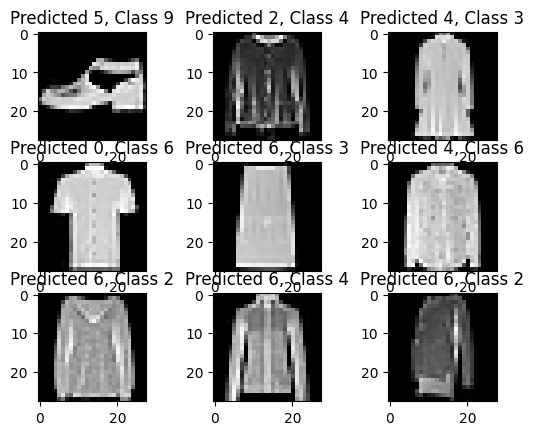

In [30]:
i=1
for j in range(9):
    plt.subplot(3,3,i)
    plt.imshow(X_test_cnn[incorrect[0][j]].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect[0][j]], Y_true_cnn[incorrect[0][j]]))
    i+=1

In [31]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


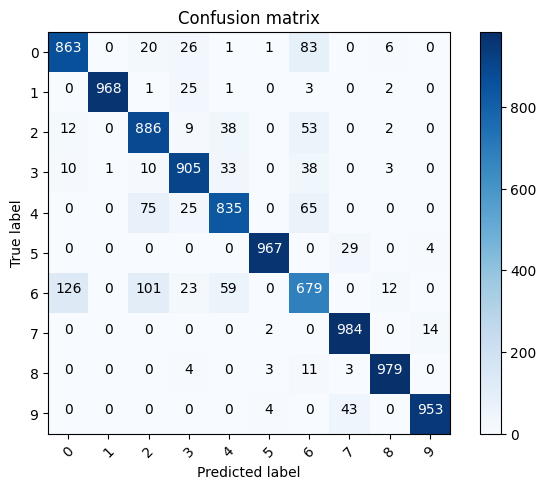

In [32]:
# Predict the values from the validation dataset
Y_pred = model_cnn.predict(X_test_cnn_f)

# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis=1)

# Convert validation observations to one hot vectors
Y_true = Y_test_cnn

# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

**Transfer Learning**

We will train a CNN model of two level layers i.e., a **feature layer** and a **classification layer** on the first 5 digits (0 to 4) of MNIST dataset

Apply **Transfer Learning** to **freeze features layer** and **fine-tune dense layers** for the classification of digits 5 to 9.

In [ ]:
(X_train, Y_train), (X_test, Y_test) = None

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

In [ ]:
# Create two datasets: one with digits below 5 and one with 5 and above

X_train_lt5 = None
Y_train_lt5 = None
X_test_lt5 = None
Y_test_lt5 = None

X_train_gte5 = None
Y_train_gte5 = None
X_test_gte5 = None
Y_test_gte5 = None

In [ ]:
# Initialize variables
batch_size = None
num_classes = None
epochs = None

# number of convolutional filters to use
num_filters = None

# size of pooling area for max pooling
pool_size = None

# convolution kernel size
kernel_size = None

**Train model for digits 0 to 4**

In [ ]:
# Function for training model for transfer learning
def train_model(model, train, test, num_classes):
    # reshape
    X_train = train[0].reshape((train[0].shape[0],) + input_shape)
    X_test = test[0].reshape((test[0].shape[0],) + input_shape)

    # convert data type
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')

    # normalize pixel values
    X_train /= 255
    X_test /= 255

    # convert class vectors to binary class matrices
    Y_train = keras.utils.to_categorical(train[1], num_classes)
    Y_test = keras.utils.to_categorical(test[1], num_classes)

    # compile
    model.compile(loss='categorical_crossentropy',
                  optimizer='adadelta',
                  metrics=['accuracy'])

    # fitting of model
    model.fit(None, None,
              batch_size=None, epochs=None,
              verbose=1,
              validation_data=(None, None))

    # evaluation
    score = model.evaluate(None, None, verbose=1)

    # report scores
    print()
    print('Test score:', score[0])
    print('Test accuracy:', score[1])
    print()

In [ ]:
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten

# Define two groups of layers: feature (convolutions) and classification (dense)
feature_layers = [
    Convolution2D(None, (None, None),
                  input_shape = None,
                  padding = None),
    Activation(None),
    Convolution2D(None, (None, None)),
    Activation(None),
    MaxPooling2D((None, None)),
    Dropout(None),
    Flatten(),
]

classification_layers = [
    Dense(None),
    Activation(None),
    Dropout(None),
    Dense(None),
    Activation(None)
]

# Create complete model
model = None
model.summary()

In [ ]:
# Train model for 5-digit classification [0 to 4]
train_model(None, (None, None), (None, None), None)

**Transfer existing trained model on 0 to 4 to build model for digits 5 to 9**

In [ ]:
# Freeze feature layers and rebuild model
for layer in feature_layers:
    layer.trainable = None

# Transfer: train dense layers for new classification task [5 to 9]
train_model(None, (None, None), (None, None), None)

In [ ]:
predicted_probabilities_transfer = model.predict(X_test_gte5.reshape(X_test_gte5.shape[0], *input_shape))
predicted_classes_transfer = np.argmax(predicted_probabilities_transfer, axis=1)

Y_true_gte5_original_labels = None

correct_transfer = np.nonzero(None)
incorrect_transfer = np.nonzero(None)

print("Predicted and Actual labels for a subset of correctly classified images (digits 5-9):")
i = 1
plt.figure(figsize=(10, 10))
for j in range(9):
    if j < len(correct_transfer[0]):
        idx = correct_transfer[0][j]
        plt.subplot(3, 3, i)
        plt.imshow(X_test_gte5[idx].reshape(28, 28), cmap='gray', interpolation='none')
        plt.title("Predicted {}, Actual {}".format(predicted_classes_transfer[idx] + 5, Y_test_gte5[idx] + 5))
        i += 1
plt.tight_layout()
plt.show()

In [ ]:
print("Predicted and Actual labels for a subset of incorrectly classified images (digits 5-9):")
i = 1
plt.figure(figsize=(10, 10))
for j in range(9):
    if j < len(incorrect_transfer[0]):
        idx = incorrect_transfer[0][j]
        plt.subplot(3, 3, i)
        plt.imshow(X_test_gte5[idx].reshape(28, 28), cmap='gray', interpolation='none')
        plt.title("Predicted {}, Actual {}".format(None, None))
        i += 1
plt.tight_layout()
plt.show()